In [7]:
import pandas as pd
from tkinter import *
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

In [8]:
def get_data():
    data=pd.read_csv(r"C:\Users\zafreen\Desktop\Zoha\BDF\BDFSWA\Leaders_data.csv")
    print(data['Current Manager 03 Email'].unique())
    data=data.drop_duplicates(subset='Requisition ID')
    data['Requisition Approved Date']=pd.to_datetime(data['Requisition Approved Date'])
    data=data[data['Requisition Approved Date']<="2021-04-30"]
    data['Year']=data['Requisition Approved Date'].dt.year
    data['Month']=data['Requisition Approved Date'].dt.month
    return data

In [9]:
a=get_data()

['clay.magouyrk@oracle.com' 't.k.anand@oracle.com']


In [10]:
def BDF(leadername):
    df=get_data()
    data=df[['Current Manager 03 Email','Requisition Approved Date','Requisition ID','Requisition Job Grade','Requisition Type of Opening','Job Function','Country Name','State Name']]
    data=df[df['Current Manager 03 Email']==leadername]
    data=data.reset_index(drop=True)
    data.groupby(['Year','Month'])['Requisition ID'].nunique().reset_index()
    grouped_data=pd.DataFrame(data.groupby(['Year','Month'])['Requisition ID'].nunique().reset_index())
    numbers =grouped_data['Requisition ID'].tolist()
    window_size=4
    index=len(numbers)-window_size
    for _ in range(13):
        index=len(numbers)-window_size
        average=round((numbers[index]+numbers[index+1]+numbers[index+2]+numbers[index+3])/window_size,2)
        numbers.append(average)
    chart=pd.DataFrame()
    chart['Y']=numbers
    chart['X']=["2019-6 ","2019-7 ","2019-8 ","2019-9 ","2019-10 ","2019-11 ","2019-12 ","2020-1 ","2020-2 ","2020-3 ","2020-4 ", "2020-5 ",
    "2020-6 ","2020-7 ","2020-8 ","2020-9 ","2020-10 ","2020-11 ","2020-12 ","2021-1 ","2021-2 ","2021-3 ","2021-4 ","2021-5 ",
    "2021-6 ","2021-7 ","2021-8 ","2021-9 ","2021-10 ","2021-11 ","2021-12 ","2022-1 ","2022-2 ","2022-3 ","2022-4 ","2022-5 "]
    return chart
def TACount(year,quarter,leadername):
    data=get_data()
    data=data[data['Current Manager 03 Email']==leadername]
    data=data.reset_index(drop=True)
    data1=data
    for i in range(len(data1)):
        if (data1['Requisition Current Status'][i]=='Filled'):
            data1.loc[i,'Conversion_Flag']=1
        else:
            data1.loc[i,'Conversion_Flag']=0
    for i in range(len(data1)):
    #     print(i)
        if data1['Month'][i] in range(1,4):
            data1.loc[i,'Quarter']=1
        elif data1['Month'][i] in range(4,7):
            data1.loc[i,'Quarter']=2
        elif data1['Month'][i] in range(7,10):
            data1.loc[i,'Quarter']=3
        elif data1['Month'][i] in range(10,13):
            data1.loc[i,'Quarter']=4
    conversion=data1.groupby(['Year','Quarter'])['Recruiter Email'].nunique()
    conversion=conversion.reset_index()
    headcount=data1.groupby(['Year','Quarter'])['Requisition ID'].nunique()
    headcount=headcount.reset_index()
    df_merge=pd.merge(headcount,conversion,how='outer',on=['Year','Quarter']).reset_index(drop=True)
    Train=df_merge
    X_train=Train.loc[:, Train.columns != 'Recruiter Email']
    Y_train=Train['Recruiter Email']
    lr=LinearRegression()
    ta_model=lr.fit(X_train,Y_train)
    numbers =df_merge['Requisition ID'].tolist()
    window_size=4
    index=len(numbers)-window_size
    for _ in range(3):
        index=len(numbers)-window_size
        average=round((numbers[index]+numbers[index+1]+numbers[index+2]+numbers[index+3])/window_size,2)
        numbers.append(average)
    if (year==2021) and (quarter==2):
        hc=numbers[8]
        a=pd.DataFrame([year,quarter,hc]).transpose()
        return ta_model.predict(a)
    if (year==2021) and (quarter==3):
        hc=numbers[9]
        a=pd.DataFrame([year,quarter,hc]).transpose()
        return ta_model.predict(a)
    if (year==2021) and (quarter==4):
        hc=numbers[10]
        a=pd.DataFrame([year,quarter,hc]).transpose()
        return ta_model.predict(a)



['clay.magouyrk@oracle.com' 't.k.anand@oracle.com']


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\zafreen\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-11-87374c616da0>", line 43, in submit
    NavigationToolbar2Tk(canvas, toolbarFrame)
NameError: name 'toolbarFrame' is not defined


['clay.magouyrk@oracle.com' 't.k.anand@oracle.com']


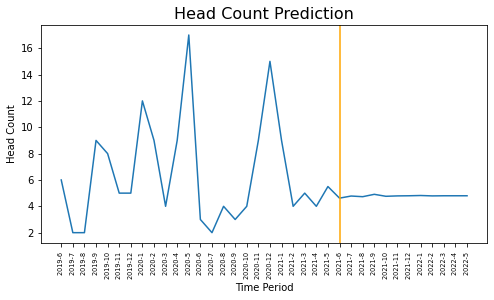

In [11]:
import tkinter as tk
from PIL import Image,  ImageTk
root=tk.Tk()
root.title("Demand Forecasting-Recruiter Match Application")
root.geometry('1350x1000')
root.iconbitmap('oracle1.ico')
username=tk.StringVar()
root.config(bg='white')
# password=tk.StringVar()
Year = tk.IntVar()
Quarter= tk.IntVar()
requisition_organization_name = tk.StringVar()
requisition_organization_department = tk.StringVar()
requisition_country_name =tk.StringVar()
requisition_job_function = tk.StringVar()
requisition_title = tk.StringVar()
requisition_type_of_opening = tk.StringVar()
requisition_job_code = tk.StringVar()
requisition_job_grade = tk.StringVar()
requisition_state_name = tk.StringVar()
requisition_city_name = tk.StringVar()
requisition_hm=tk.StringVar()
requisition_approved_date=tk.StringVar()
def submit():
    global User
    User=username.get()
#     Pass=password.get()
    username.set("")
#     password.set("")
    chart=BDF(User)
    x=chart['X']
    y =chart['Y'] 
    fig = plt.figure(figsize=(8,4))
    plt.plot(x,y)
    plt.xticks(x,fontsize=6.5,rotation=90)
    plt.xlabel('Time Period')
    plt.ylabel("Head Count")
    plt.title("Head Count Prediction", size=16)
    plt.axvline(x=24,color='orange')
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().grid(row=1, column=1) 
    NavigationToolbar2Tk(canvas, toolbarFrame)
def submit1():
    year=Year.get()
    quarter=Quarter.get()
    Predicted_TA_count=TACount(year,quarter,User)
    Predicted_TA_count=round(Predicted_TA_count[0])
    Predicted_TA_count_label=tk.Label(root, text=Predicted_TA_count,bg='white')
    Predicted_TA_count_label.grid(row=3,column=6)
    Year.set("")
    Quarter.set("")
Username_label = tk.Label(root, text = 'Email', font=('calibre',10, 'bold'),bg='white')
Username_entry = tk.Entry(root,textvariable =username, font=('calibre',10,'normal'),bg='white')
# Password_label = tk.Label(root, text = 'Password', font=('calibre',10, 'bold'))
# Password_entry = tk.Entry(root,textvariable =password, font=('calibre',10,'normal'))
submit_button1=tk.Button(root,text = 'Submit', command = submit)
year_label = tk.Label(root, text = 'Year', font=('calibre',10, 'bold'),bg='white')
year_entry = tk.Entry(root,textvariable =Year, font=('calibre',10,'normal'),bg='white')
quarter_label = tk.Label(root, text = 'Quarter', font=('calibre',10, 'bold'),bg='white')
quarter_entry = tk.Entry(root,textvariable =Quarter, font=('calibre',10,'normal'),bg='white')
submit1_button=tk.Button(root,text = 'Predict ', command = submit1)
Username_label.grid(row=0,column=0)
Username_entry.grid(row=0,column=1)
# Password_label.grid(row=1,column=3)
# Password_entry.grid(row=1,column=4)
submit_button1.grid(row=0,column=2)
year_label.grid(row=2,column=0)
year_entry.grid(row=2,column=1)
quarter_label.grid(row=2,column=2)
quarter_entry.grid(row=2,column=3)
submit1_button.grid(row=2,column=7)
root.mainloop()